In [114]:
from skimage import data
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

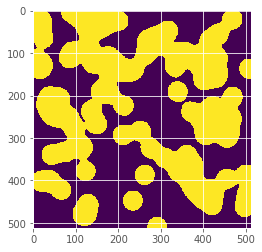

In [137]:
image = data.binary_blobs().astype(np.float32)
plt.imshow(image)

In [116]:
np.shape(image)

(512, 512)

In [117]:
img_4d = tf.reshape(image, [1, image.shape[0], image.shape[1], 1])
img_4d.get_shape().as_list()

[1, 512, 512, 1]

In [118]:
x = tf.linspace(-3.0, 3.0, 100)

sess = tf.Session()
x_ = sess.run(x)
print(x_)

sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

[0.00443191 0.00530586 0.00632887 0.00752144 0.00890595 0.01050665
 0.01234962 0.01446263 0.01687508 0.01961775 0.02272256 0.02622228
 0.03015006 0.03453908 0.03942196 0.04483017 0.05079339 0.05733884
 0.06449047 0.07226815 0.08068691 0.08975609 0.09947861 0.10985006
 0.12085805 0.13248162 0.14469069 0.15744552 0.17069657 0.18438436
 0.19843954 0.21278308 0.22732687 0.2419743  0.25662115 0.27115688
 0.2854654  0.2994271  0.3129202  0.32582232 0.33801258 0.34937328
 0.35979187 0.36916268 0.3773888  0.38438377 0.39007297 0.39439505
 0.39730301 0.39876503 0.39876503 0.39730301 0.39439505 0.39007294
 0.38438374 0.37738878 0.36916265 0.35979187 0.34937328 0.33801255
 0.3258223  0.31292015 0.29942703 0.28546533 0.27115682 0.25662115
 0.2419743  0.22732687 0.21278308 0.19843945 0.18438432 0.17069651
 0.15744548 0.14469066 0.13248162 0.12085805 0.10984997 0.09947855
 0.08975606 0.08068687 0.07226812 0.06449046 0.05733884 0.05079339
 0.04483017 0.03942192 0.03453906 0.03015004 0.02622227 0.0227

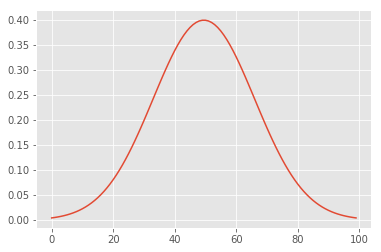

In [119]:
mean = 0.0
sigma = 1.0

sess = tf.Session()

# creating a 1-D gaussian
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) * 1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))
res = z.eval(session=sess)

print(res)
plt.plot(res)

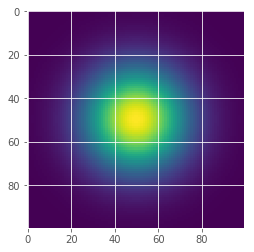

In [120]:
ksize = z.get_shape().as_list()[0]

sess = tf.Session()

# 2d gaussin by creating z * transpose(z)
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

plt.imshow(z_2d.eval(session=sess)) # this is what the 2d gaussian kernel looks like!

In [121]:
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])

In [122]:
z_4d.get_shape().as_list()

[100, 100, 1, 1]

In [123]:
convolution = tf.nn.conv2d(img_4d, z_4d, strides=[1, 2, 2 ,1], padding='SAME')

In [124]:
res = convolution.eval(session = sess)

In [125]:
np.shape(res)

(1, 256, 256, 1)

Notice that due to the convolution on the image, the image has been downsampled. This is due to the stride of the image!

In [126]:
img_4d = tf.reshape(image, [1, image.shape[0], image.shape[1], 1])
img_4d.get_shape().as_list()

[1, 512, 512, 1]

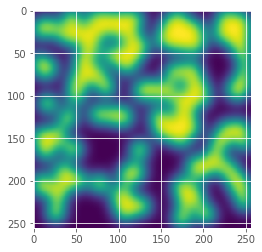

In [127]:
# plotting the 4d image by using the squeeze!
plt.imshow(np.squeeze(res))

In [128]:
# using the gabor kernel: Modulated Gaussian! sine * gaussian=gabor

# step 1: create the sine
sine_lin = tf.linspace(-3.0, 3.0, ksize)
sine_f = tf.sin(sine_lin)

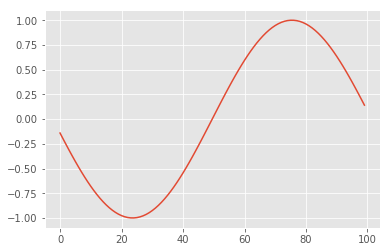

In [129]:
x_1 = sinf.eval(session = sess)
plt.plot(x_1)

In [130]:
# now we compress this into a 1D vector 
sinf = tf.reshape(sine_f, [ksize, 1])
sinf.get_shape().as_list()

[100, 1]

In [131]:
no_of_lines = tf.ones((1, ksize))

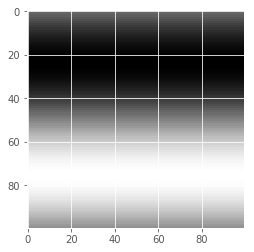

In [132]:
final_sine_kernel = tf.matmul(sinf, no_of_lines)
plt.imshow(final_sine_kernel.eval(session=sess), cmap='gray')

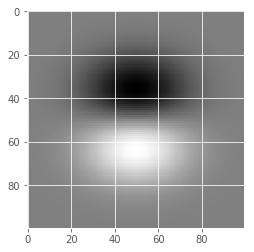

In [133]:
# now multiply the 2 together to get the modulated sine wave: gabor kernel
gabor = tf.multiply(final_sine_kernel, z_2d)
plt.imshow(gabor.eval(session=sess), cmap='gray')

# can you see the modulation?

In [134]:
gabor_4d = tf.reshape(gabor, [ksize, ksize, 1, 1])

In [135]:
gabor_4d.get_shape().as_list()

[100, 100, 1, 1]

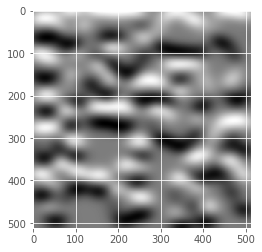

In [136]:
# finally convolve it with the image!

convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME')
convolved_img = convolved[0, :, :, 0]
plt.imshow(np.squeeze(convolved_img.eval(session=sess)), cmap='gray')